<a href="https://colab.research.google.com/github/smdr111/Visualization_Matplotlib_roadmap/blob/main/VISUALIZATION_04_scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

### 4.4 **Scatter plot** - Tarqoqlik diagrammasi
**Scatter plot** yordamida ma'lumotlar qanchalik tarqoq ekanin kuzatishimiz mumkin. Bu grafik ham bir nechta ustunlar orasidagi bog'liqlikni (korrelyasiya) ko'rishga xizmat qiladi.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # agar seaborn o'rnatilmagan bo'lsa pip install seaborn

Darsimiz uchun Mercedes-Benz firmasi avtomobillari narxini jamlagan jadvalni yuklab olamiz.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


Kelin `scatterplot()` yordamida mashinalar narxi va ishlab chiqarilgan yili o'rtasida bog'liqlikni ko'ramiz.

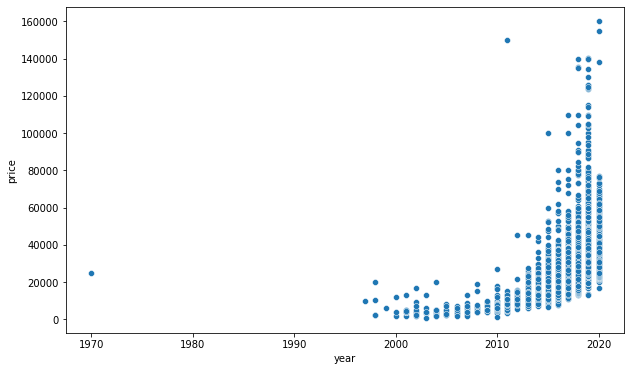

In [ ]:
plt.figure(figsize=(10,6))
# sns.scatterplot(x=df['year'], y=df['price'])
sns.scatterplot(data=df, x='year', y='price')
plt.show()

Grafikdagi har bir nuqta bu - jadvaldagi `price` ustuni uchun har bir qatordagi qiymatlarni ko'rsatadi. Grafikdan biz quyidagi xulosani qilishimiz mumkin:
- Jadvaldagi aksar mashinalar 2000-yildan keyin ishlab chiqarilgan (nuqtalar zichligidan)
- Jadvalda 1 dona 1970 yilda ishlab chiqarilgan mashina bor (va u bizga kelajakda hisob-kitoblarda halaqit berishi mumkin)
- Narx va yil o'rtasida pozitiv korrelyasiya (bog'liqlik) bor, ya'ni mashinaning yili oshgan sari (qancha yangi bo'lsa) narxi ham shuncha baland ekan.

`regplot()` funksiyasi yordamida bu o'sishni ham chizib ko'rsatishimiz mumkin. Lekin, keling avval 1970-yil mashinani olib tahlaymiz.

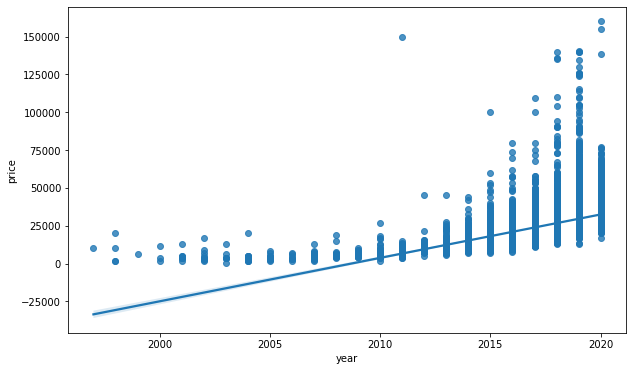

In [ ]:
df = df[df.year!=1970] # yili 1970 ga teng bo'lmagan qatorlarni saqlab qolamiz

plt.figure(figsize=(10,6))
# sns.regplot(x=df['year'], y=df['price'])
sns.regplot(data=df, x='year', y='price')
plt.show()

Grafikdagi to'gri chiziq **regressiya chizig'i (regression line)** deb ataladi va `x` va `y` o'qlardagi qiymatlar o'rtasidagi boqliqlikni ko'rsatadi.

Keling endi mashinaning narxi (`price`) va bosib o'tgan kilometri (`mileage`) o'rtasida bog'liqlikni ko'ramiz.

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


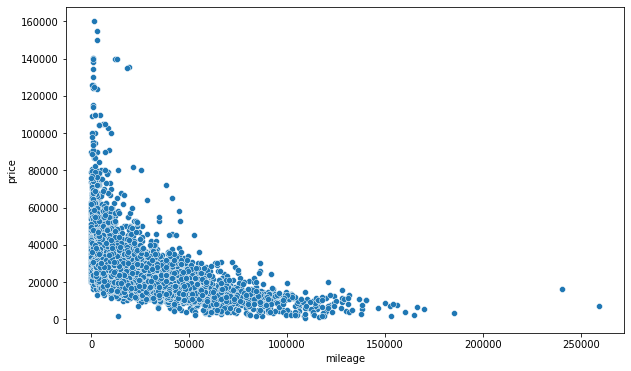

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['mileage'], y=df['price'])
plt.show()

Bu grafikda biz negativ korrelyasiyani kuzatishimiz mumkin, y'ani, kilometri oshgan sari mashina narxi tushib borayapti.

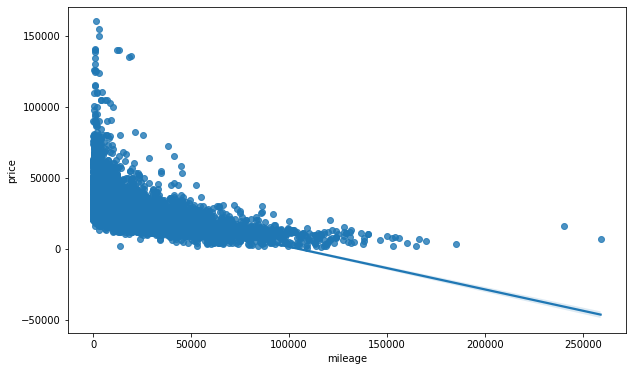

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=df['mileage'], y=df['price'])
plt.show()

Keling grafigimizga 3-o'zgaruvchi, mashina korobkasi turini ham qo'shamiz (`transmission`) buning uchun `hue` parametridan foydalanamiz.

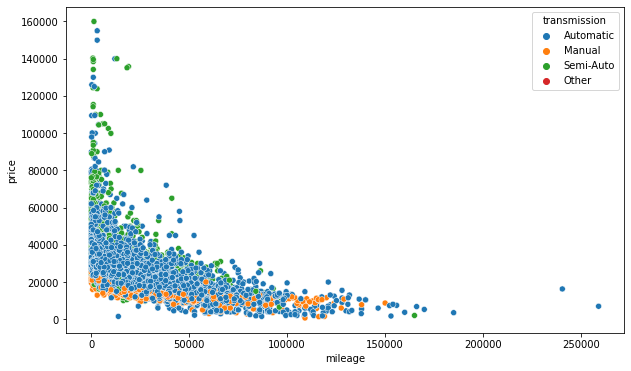

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['mileage'], y=df['price'], hue="transmission")
plt.show()

Grafikdan qanday xulosalar qilishimiz mumkin:
- Aksar mashinalar avtomat korobka (`Automatic`)
- Mexanik (`Manual`) korobka mashinalar juda arzon (sariq rang)
- Yarim-avto (`Semi-auto`) mashinalar nisbatan qimmat

4-o'zgaruvchini qo'shish uchun esa `style` parametridan foydalanamiz:

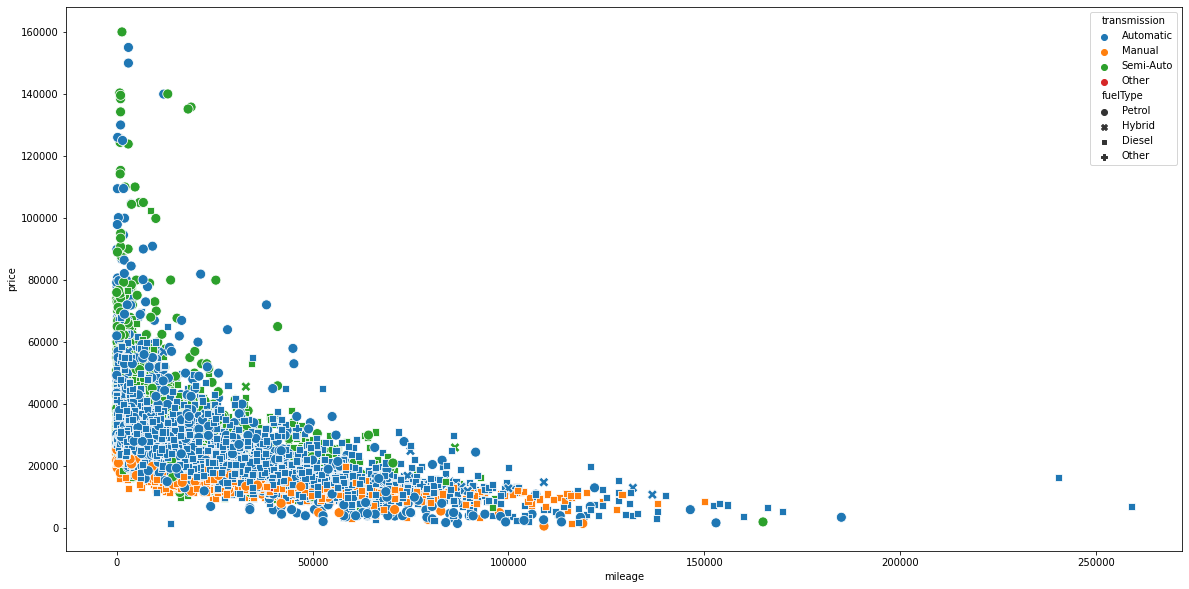

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x=df['mileage'], y=df['price'], hue="transmission", style="fuelType", s=100) # s=100 nuqtalar hajmi
plt.show()

#### **Quyidagi javdaldan qanday xulosalar olish mumkin?**

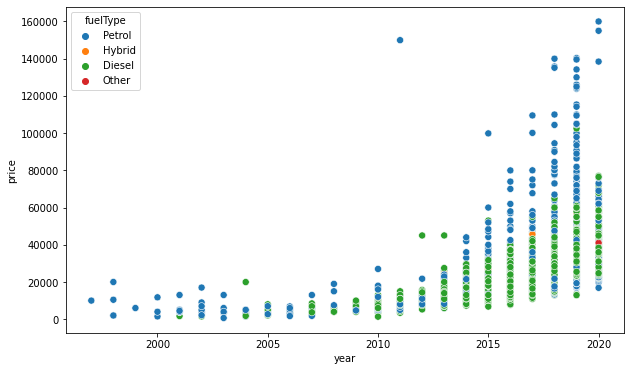

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['year'], y=df['price'], hue="fuelType", s=50)
plt.show()

Scatter plotning ayan bir ko'rinishi bu Swarm plot. `swarmplot` yordamida yuqoridagi har bir kategoriyani (`transmission`) alohida swarm (to'da) ko'rinishida chiqarish mumkin.

**Diqqat!** `swarmplot`da kategoriyalar soni qancha ko'p bo'lsa, funksiya shuncha uzoq vaqt ishlaydi.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 96.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


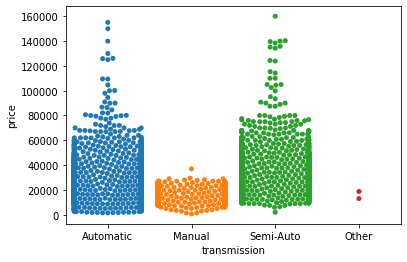

In [ ]:
sns.swarmplot(data=df, x=df['transmission'], y=df['price'])
plt.show()

Yuqoridagi jadvaldan ham turli xulosalar qilish mumkin:
- `Automatic` va `Semi-auto` mashinalar deyarli bir hil narx kategoriyada
- `Manual` mashinalar arzon mashinalar segmentida (30000$ gacha).

### scatterplot haqida ko'proq: https://seaborn.pydata.org/generated/seaborn.scatterplot.html